In [10]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('engineering_games.csv')

In [4]:
x = df[['3PA_Rate', 'AST_Rate', 'PACE_EST']].dropna()

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [6]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
labels = kmeans.fit_predict(X_scaled)

In [8]:
df = df.loc[x.index].copy()
df['STRATEGY_LABEL'] = labels

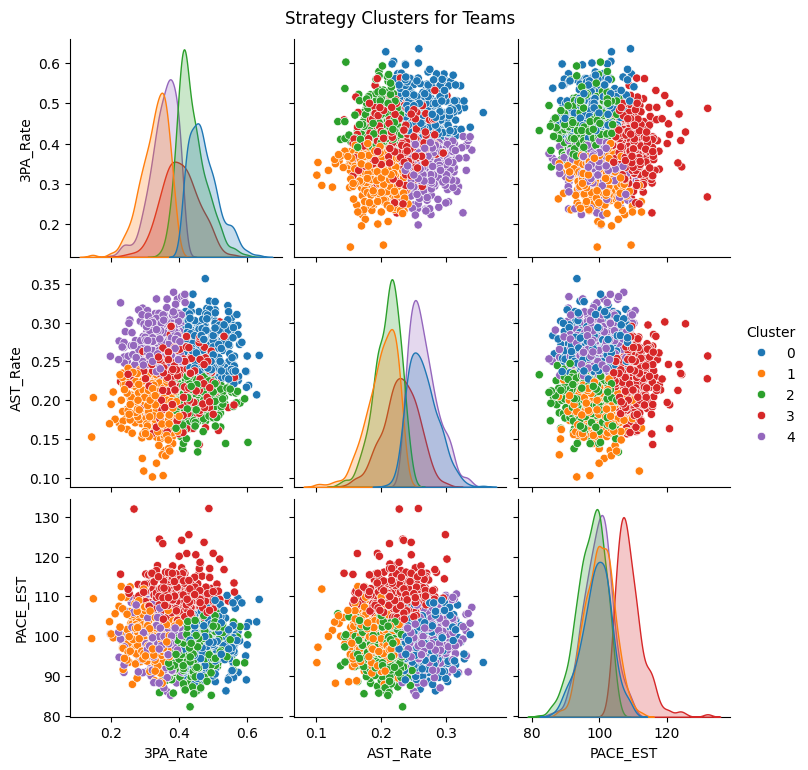

In [12]:
df['Cluster'] = labels
sns.pairplot(df[['3PA_Rate', 'AST_Rate', 'PACE_EST', 'Cluster']], hue = 'Cluster', palette = 'tab10')
plt.suptitle('Strategy Clusters for Teams', y = 1.02)
plt.show()

In [13]:
df.to_csv('Strategy_labeled_games.csv', index = False)